In [1]:
## Import required libraries
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Project 2 INN')

In [45]:
svnhDf = h5py.File('/content/drive/My Drive/Colab Notebooks/Project 2 INN/SVHN_single_grey1.h5', 'r')
svnhDf

<HDF5 file "SVHN_single_grey1.h5" (mode r)>

In [0]:
X_train = svnhDf['X_train'][:]
y_train = svnhDf['y_train'][:]
X_test = svnhDf['X_test'][:]
y_test = svnhDf['y_test'][:]


In [0]:
X_train
svnhDf.close()

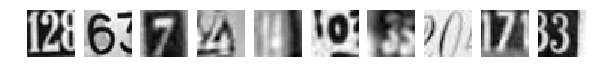

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [48]:
#Visualizing the dataset
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [49]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


In [0]:
from keras.utils import np_utils
# one hot encode y
y_train_c = np_utils.to_categorical(y_train)
y_test_c = np_utils.to_categorical(y_test)

# no.of classes
num_classes = y_test_c.shape[1]


In [51]:
num_classes

10

In [0]:
#flatten x train / x test for k means inputs

kx_train = []
for i in range(42000):
    kx_train.append(X_train[i,:].flatten())
kx_test = []
for i in range(18000):
    kx_test.append(X_test[i,:].flatten())

In [53]:
len(kx_train)

42000

In [54]:
kx_train[0:2]

[array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
        0.20799099], dtype=float32),
 array([0.34101608, 0.3414451 , 0.34656274, ..., 0.29498273, 0.30054745,
        0.31092745], dtype=float32)]

In [0]:
#Get subset of data
kx_train =kx_train[:2000]
kx_test =kx_test[:2000]
ky_train = y_train[0:2000]
ky_test = y_test[0:2000]

In [56]:
print(len(kx_train))
print(len(kx_test))
print(len(ky_train))
print(len(ky_test))

2000
2000
2000
2000


In [57]:
ky_train

array([2, 6, 7, ..., 4, 7, 9], dtype=uint8)

In [0]:
# Check for different k values the MSE value to check which is best k

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
 
acc =[]
bestk = []

for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors= k , weights = 'uniform', metric='euclidean')
    knn.fit(kx_train, ky_train)
    pred = knn.predict(kx_test)
    ascore = accuracy_score(ky_test, pred)
    MSE = 1-ascore
    acc.append(MSE)
    bestk.append(k)


In [59]:
print("Best K : ",acc.index(min(acc))+1)

Best K :  6


In [0]:
#train model for k=6 as best k is 6 

knn = KNeighborsClassifier(n_neighbors= 6 , weights = 'uniform', metric='euclidean')
knn.fit(kx_train, ky_train)
pred= knn.predict(kx_test)

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,ky_test)

array([[104,  17,  22,  28,  29,  36,  40,  14,  51,  43],
       [ 11, 101,  25,  31,  23,  26,  22,  27,  19,  15],
       [ 12,  18,  71,  22,  20,  18,  16,  49,  17,  24],
       [ 15,   9,  18,  33,  11,  20,  12,  19,  20,  15],
       [ 15,  14,   8,  13,  84,  15,  20,   9,  10,   9],
       [ 10,   6,   8,  22,   6,  46,  11,   3,  11,  13],
       [ 26,  12,   6,   9,  11,  16,  53,   5,  30,  19],
       [  4,   5,  16,   9,   4,   6,   3,  72,   6,  10],
       [  6,   2,   4,   9,   4,  10,  13,   2,  22,  16],
       [ 18,   1,   9,   9,  12,  18,  12,   5,  12,  38]])

In [0]:
#Neural Network

In [0]:
import keras
from keras import losses
from keras import optimizers
from keras.layers import Dropout, MaxPooling2D
from keras.layers import BatchNormalization

In [65]:
model = Sequential()  
model.add(BatchNormalization(input_shape = (1024,)))  ### Batch_Norm Layer
    
model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
    
sgd = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy']) 

W0714 12:54:02.237371 139743272327040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 12:54:02.307631 139743272327040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 12:54:02.444328 139743272327040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0714 12:54:02.471492 139743272327040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0714 12:54:02.562391 

In [66]:
model.fit(X_train, y_train_c, validation_data=(X_test, y_test_c), epochs=10, batch_size=100, verbose=1)

W0714 12:54:46.907047 139743272327040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 157us/step - loss: 1.4581 - acc: 0.5089 - val_loss: 0.9993 - val_acc: 0.6941
Epoch 2/10
42000/42000 [==============================] - 5s 130us/step - loss: 0.9429 - acc: 0.7054 - val_loss: 0.8680 - val_acc: 0.7348
Epoch 3/10
42000/42000 [==============================] - 6s 131us/step - loss: 0.8027 - acc: 0.7484 - val_loss: 0.7882 - val_acc: 0.7598
Epoch 4/10
42000/42000 [==============================] - 6s 132us/step - loss: 0.7180 - acc: 0.7772 - val_loss: 0.7345 - val_acc: 0.7841
Epoch 5/10
42000/42000 [==============================] - 5s 130us/step - loss: 0.6699 - acc: 0.7913 - val_loss: 0.7101 - val_acc: 0.7902
Epoch 6/10
42000/42000 [==============================] - 5s 129us/step - loss: 0.6174 - acc: 0.8070 - val_loss: 0.6816 - val_acc: 0.7986
Epoch 7/10
42000/42000 [==============================] - 6s 134us/step - loss: 0.5828 - acc: 0.8173 - val_loss: 0.6540 - 

In [67]:
model.evaluate(X_test, y_test_c, verbose=1)

18000/18000 [==============================] - 1s 53us/step


[0.6100418663024902, 0.8281111111111111]

In [0]:
#Neural Network is accurate in prediction of the complex image data.